In [1]:
##Lab | Customer Analysis Round 2
##For this lab, we will be using the marketing_customer_analysis.csv file that you can find in the 
##files_for_lab folder. Check out the files_for_lab/about.md to get more information if you are using ##the Online Excel.

##Note: For the next labs we will be using the same data file. Please save the code, so that you can 
##re-use it later in the labs following this lab.

##Dealing with the data

## 1 Show the dataframe shape.

## 2 Standardize header names.

## 3 Which columns are numerical?

## 4 Which columns are categorical?

## 5 Check and deal with NaN values.

## 6 Datetime format - Extract the months from the dataset and store in a separate column.
# Then filter the data to show only the information for the first quarter ,ie. 
#January, February and March. Hint: ##If data from March does not exist, consider only January 
# and February.

##BONUS: Put all the previously mentioned data transformations into a function.

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [4]:
data = pd.read_csv("./files_for_lab/csv_files/marketing_customer_analysis.csv")

In [5]:
## 1 Show the dataframe shape.
# shape of the dataframe
data.shape

(10910, 26)

In [6]:
## 2 Standardize header names.
# dropping column
try:
    data = data.drop(["Unnamed: 0"], axis = 1)
except:
    pass

In [7]:
## 2 Standardize header names.
# adding space between words in column name
data = data.rename(columns={'EmploymentStatus':'Employment Status'})

In [8]:
## 2 Standardize header names.
# lowercase for all column headers
cols = []
for i in data.columns:
    cols.append(i.lower())
data.columns = cols

In [9]:
## 2 Standardize header names.
# in case we wanna display the dataframe with all the columns
pd.set_option('display.max_columns', None)

In [10]:
# 3 checking numerical values 
## 3 Which columns are numerical?
# displaying only columns with numerical values
display(data.select_dtypes(np.number).columns)
print("Total column(s) with numerical values:",len(data.select_dtypes(np.number).columns))

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')

Total column(s) with numerical values: 8


In [11]:
# displaying only columns with categorical values
## 4 Which columns are categorical?
display(data.select_dtypes(object).columns)
print("Total column(s) with categorical values:",len(data.select_dtypes(object).columns))

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employment status', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

Total column(s) with categorical values: 17


In [12]:
## 5 Check and deal with NaN values.
# counting nan
data.isna().sum()

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [13]:
## 5 Check and deal with NaN values.
# displaying percentage of the nan values in the dataframe format,
nulls = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
nulls = nulls.reset_index()
nulls.columns = ['header_name', 'nulls_in_%']
display(nulls)

,header_name,nulls_in_%
0,customer,0.00
1,state,5.78
2,customer lifetime value,0.00
3,response,5.78
4,coverage,0.00
5,education,0.00
6,effective to date,0.00
7,employment status,0.00
8,gender,0.00
9,income,0.00


In [14]:
# looking for duplicates
duplicate = data[data.duplicated()]
print(len(duplicate))
# dropping duplicates, then check again to make sure
data = data.drop_duplicates()
duplicate = data[data.duplicated()]
display(duplicate)
print(len(duplicate))

37


,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type


0


In [15]:
## 5 Check and deal with NaN values.
# counting nan
# checking whether the nan are in the same row: response and state
# prints False if the rows dont match. prints nothing if the rows match
# saving index of the nan values to a variable
# the variables will then be matched
na_response = data[data['response'].isnull()].index.tolist()
na_state = data[data['state'].isnull()].index.tolist()
for i in range(len(na_state)):
    if na_response[i] != na_state[i]:
        print(False)

In [16]:
## 5 Check and deal with NaN values.
# just counting unique values to find the mode, if theres any
display(data["response"].value_counts(dropna=False))
display(data["state"].value_counts(dropna=False))

No     8795
Yes    1464
NaN     614
Name: response, dtype: int64

California    3548
Oregon        2897
Arizona       1934
Nevada         992
Washington     888
NaN            614
Name: state, dtype: int64

In [17]:
## 5 Check and deal with NaN values.
# replacing nan values with mode, because adding around 5% to the mode value wont change much
data['state'] = data['state'].fillna("California")
display(data['state'].value_counts(dropna = False))
data['response'] = data['response'].fillna("No")
display(data['response'].value_counts(dropna = False))

California    4162
Oregon        2897
Arizona       1934
Nevada         992
Washington     888
Name: state, dtype: int64

No     9409
Yes    1464
Name: response, dtype: int64

In [18]:
## 5 Check and deal with NaN values.

In [19]:
data.isna().sum()

customer                            0
state                               0
customer lifetime value             0
response                            0
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           623
months since policy inception       0
number of open complaints         623
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     608
vehicle size                      608
vehicle type                     5465
dtype: int64

In [20]:
# checking whether the nan are in the same row
# prints False if the rows dont match. prints nothing if the rows match

#saving index of the nan values to a variable
# the variables will then be matched
na_claim = data[data['months since last claim'].isnull()].index.tolist()
na_complaints = data[data['number of open complaints'].isnull()].index.tolist()
for i in range(len(na_claim)):
    if na_claim[i] != na_complaints[i]:
        print(False)

In [21]:
# quick numerical analysis check
display(data[["months since last claim","number of open complaints"]].describe())
display(data[["months since last claim","number of open complaints"]].mode())

,months since last claim,number of open complaints
count,10250.000000,10250.000000
mean,15.145073,0.383512
std,10.078893,0.911190
min,0.000000,0.000000
25%,6.000000,0.000000
50%,14.000000,0.000000
75%,23.000000,0.000000
max,35.000000,5.000000


,months since last claim,number of open complaints
0,3.0,0.0


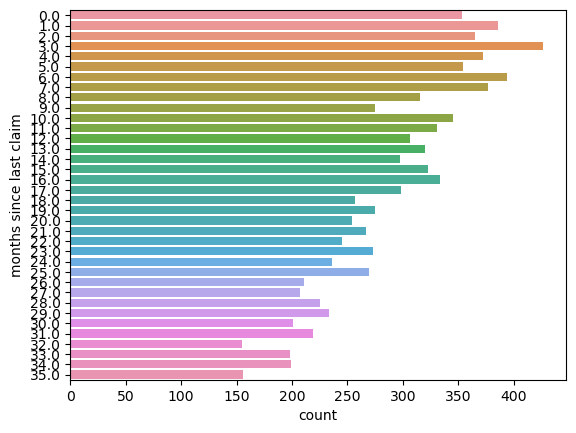

In [22]:
# checking the data distribution of the columns above
sns.countplot(y = data["months since last claim"])
plt.show()

In [23]:
# getting mean
mean_claim = data["months since last claim"].mean(skipna=True)
# getting median
median_complaints = data["months since last claim"].median(skipna=True)

In [24]:
# replacing nan values with mean, because the data looks evenly distributed
data['months since last claim'] = data['months since last claim'].fillna(mean_claim)
data['number of open complaints'] = data['number of open complaints'].fillna(median_complaints)

In [25]:
# check again
data.isna().sum()

customer                            0
state                               0
customer lifetime value             0
response                            0
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim             0
months since policy inception       0
number of open complaints           0
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     608
vehicle size                      608
vehicle type                     5465
dtype: int64

In [26]:
# checking whether the nan are in the same row
# prints False if the rows dont match. prints nothing if the rows match

#saving index of the nan values to a variable
# the variables will then be matched
na_vclass = data[data['vehicle class'].isnull()].index.tolist()
na_vsize = data[data['vehicle size'].isnull()].index.tolist()
for i in range(len(na_vclass)):
    if na_vclass[i] != na_vsize[i]:
        print(False)

In [27]:
# identifying the values (and the nan)
display(data["vehicle class"].value_counts(dropna=False))
display(data["vehicle size"].value_counts(dropna=False))

Four-Door Car    5200
Two-Door Car     2112
SUV              2009
NaN               608
Sports Car        548
Luxury SUV        208
Luxury Car        188
Name: vehicle class, dtype: int64

Medsize    7233
Small      1962
Large      1070
NaN         608
Name: vehicle size, dtype: int64

In [28]:
# replacing the nan values with mode, because modes in both columns are significantly dominant
data['vehicle class'] = data['vehicle class'].fillna("Four-Door Car")
data['vehicle size'] = data['vehicle size'].fillna("Medsize")

In [29]:
# checking again
data.isna().sum()

customer                            0
state                               0
customer lifetime value             0
response                            0
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim             0
months since policy inception       0
number of open complaints           0
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                       0
vehicle size                        0
vehicle type                     5465
dtype: int64

In [30]:
# checking the last column
data[["vehicle type"]].value_counts(dropna=False)

vehicle type
NaN             5465
A               5408
dtype: int64

In [31]:
# 2 possibilities: either put all A in nan, or put "unknown". 
# either way the value in that column is not significant in analyzing the data. not enough valuable info
# therefore: drop that column
# try:
#     data = data.drop(['vehicle type'], axis=1)
# except:
#     pass

# NOT DROP THE VEHICLE TYPE: SUMMON IT AGAIN BY RERUNNING IT
# then fill the NaN with value

In [32]:
data['vehicle type'] = data['vehicle type'].fillna("not A")

In [33]:
# final checking
data.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employment status                0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
vehicle type                     0
dtype: int64

In [34]:
## 6 Datetime format - Extract the months from the dataset and store in a separate column.
# Then filter the data to show only the information for the first quarter , 
#ie. January, February and March. Hint: ##If data from March does not exist, consider only January 
# and February.
# extracting months value from datetime column
data['month'] = pd.DatetimeIndex(data['effective to date']).month
data["month"].value_counts(dropna=False)
data.head(1)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.21696,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.8,Four-Door Car,Medsize,not A,2
